# Explore here

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error


In [4]:
df_base=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/data/raw/df_base_1.csv")

In [5]:
df_base

,Open time,Open,High,Low,Close,Volume,Prom_dia,100_medias,48_medias,20_medias,10_medias,rsi_14,rsi_9,rsi_21,Cambio_dia
0,2017-08-22 06:00:00,3626.99,3854.46,3619.95,3803.00,62.096369,3737.205,4083.50800,4028.432813,3928.07000,3857.6535,46.761819,47.324021,48.100095,-176.01
1,2017-08-22 07:00:00,3803.00,3803.00,3733.80,3798.08,61.959721,3768.400,4078.21685,4020.889167,3911.07725,3831.7685,46.548444,47.050470,47.917537,4.92
2,2017-08-22 08:00:00,3798.08,3805.76,3750.08,3794.12,36.868111,3777.920,4073.18735,4013.585417,3897.29450,3804.7085,46.365061,46.805487,47.764330,3.96
3,2017-08-22 09:00:00,3794.12,3920.31,3775.01,3904.56,76.172178,3847.660,4068.33245,4006.420208,3885.61275,3780.0075,52.039857,54.275251,52.236330,-110.44
4,2017-08-22 10:00:00,3904.56,3904.56,3826.12,3844.08,59.322181,3865.340,4063.85575,3999.707604,3879.05725,3763.3435,48.983379,49.953645,49.785506,60.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70300,2025-09-05 11:00:00,112256.36,112439.36,112138.15,112354.00,270.503080,112288.755,110622.15130,111230.909896,110996.54300,111784.1115,61.400485,63.852666,58.915642,-97.64
70301,2025-09-05 12:00:00,112354.00,113384.62,112040.00,113214.78,2902.049780,112712.310,110657.94995,111246.339792,111131.17925,111933.6055,68.073543,73.090802,63.894324,-860.78
70302,2025-09-05 13:00:00,113214.78,113310.01,112706.71,113084.16,2093.909320,113008.360,110688.85295,111272.740208,111290.51325,112078.6925,66.203188,70.035215,62.684000,130.62
70303,2025-09-05 14:00:00,113084.16,113084.16,110487.65,110569.99,3593.878660,111785.905,110721.94670,111304.307500,111457.35650,112257.6625,42.180304,36.759037,45.330016,2514.17


In [ ]:
df_porcentual=pd.DataFrame()
df_porcentual["time"]=df_base["Open time"]
df_porcentual["close"]=df_base["Close"]
df_porcentual["rsi_9"]=df_base["rsi_9"]
df_porcentual["rsi_14"]=df_base["rsi_14"]
df_porcentual["rsi_21"]=df_base["rsi_21"]
df_porcentual["volumen"]=df_base["Volume"]
#df_porcentual["open"]=df_base["Open"]
#df_porcentual["high"]=df_base["High"]
#df_porcentual["low"]=df_base["Low"]
#df_porcentual["close"]=df_base["Close"]
#df_porcentual["100_medias"]=df_base["100_medias"]
#df_porcentual["48_medias"]=df_base["48_medias"]
#df_porcentual["20_medias"]=df_base["20_medias"]
#df_porcentual["10_medias"]=df_base["10_medias"]


#df_base=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/data/raw/df_base_1.csv")
#df_porcentual["high"]=df_base["High"]
#df_porcentual["low"]=df_base["Low"]

In [7]:
df_porcentual

,time,close,rsi_9,rsi_14,rsi_21,volumen
0,2017-08-22 06:00:00,3803.00,47.324021,46.761819,48.100095,62.096369
1,2017-08-22 07:00:00,3798.08,47.050470,46.548444,47.917537,61.959721
2,2017-08-22 08:00:00,3794.12,46.805487,46.365061,47.764330,36.868111
3,2017-08-22 09:00:00,3904.56,54.275251,52.039857,52.236330,76.172178
4,2017-08-22 10:00:00,3844.08,49.953645,48.983379,49.785506,59.322181
...,...,...,...,...,...,...
70300,2025-09-05 11:00:00,112354.00,63.852666,61.400485,58.915642,270.503080
70301,2025-09-05 12:00:00,113214.78,73.090802,68.073543,63.894324,2902.049780
70302,2025-09-05 13:00:00,113084.16,70.035215,66.203188,62.684000,2093.909320
70303,2025-09-05 14:00:00,110569.99,36.759037,42.180304,45.330016,3593.878660


In [8]:
def porcentaje (df,columna_objetivo,n_de_intervalos,columna_nueva):

    for i in range(n_de_intervalos,len(df[columna_objetivo])):
        cambio=(df[columna_objetivo][i-n_de_intervalos]-df[columna_objetivo][i])/df[columna_objetivo][i-n_de_intervalos]
        df.loc[i,columna_nueva]=cambio*100

porcentaje(df_porcentual,"close",1,"hora%")
porcentaje(df_porcentual,"close",4,"4hora%")
porcentaje(df_porcentual,"close",24,"dia%")
porcentaje(df_porcentual,"close",48,"2dias%")
porcentaje(df_porcentual,"close",24*7,"1semana%")
df_porcentual.dropna(inplace=True)
df_porcentual.reset_index(drop=True,inplace=True)


KeyboardInterrupt: 

In [ ]:
df_porcentual.tail(26)

,time,close,rsi_9,rsi_14,rsi_21,volumen,hora%,4hora%,dia%,2dias%,1semana%,prediccion_4hora%,prediccion_1dia%
70124,2025-09-03 10:00:00,111449.99,61.991412,59.744387,58.522920,377.12634,-0.123715,-0.655675,-1.092094,-2.651324,-0.427907,-0.728022,0.736770
70125,2025-09-03 11:00:00,111437.77,61.583168,59.529856,58.395652,457.60494,0.010965,-0.304132,-1.553247,-2.440540,-0.103933,-0.704402,0.563337
70126,2025-09-03 12:00:00,111112.00,51.426197,53.966453,55.044897,440.11635,0.292334,-0.082877,-2.128764,-1.836460,0.208740,-0.671989,0.160253
70127,2025-09-03 13:00:00,111475.07,59.749652,58.609185,57.873586,862.57140,-0.326760,-0.146246,-0.292470,-2.248559,0.010916,-0.751352,0.906992
70128,2025-09-03 14:00:00,112261.37,71.604606,66.491250,63.146727,1480.64380,-0.705360,-0.728022,-0.809411,-2.853749,-0.398360,0.232823,2.155114
70129,2025-09-03 15:00:00,112222.74,70.457648,65.828014,62.741596,766.67332,0.034411,-0.704402,-1.257404,-3.160759,-0.198875,0.025841,2.417006
70130,2025-09-03 16:00:00,111858.66,60.228629,59.776163,58.995931,604.19676,0.324426,-0.671989,-0.968364,-2.835626,0.234389,-0.315264,2.163731
70131,2025-09-03 17:00:00,112312.64,66.957873,64.196248,61.968589,574.69857,-0.405851,-0.751352,-1.261013,-3.107596,0.029062,0.287563,2.249221
70132,2025-09-03 18:00:00,112000.00,59.197866,59.358713,58.881873,465.80305,0.278366,0.232823,-1.223293,-2.526547,-0.047156,0.046893,1.806250
70133,2025-09-03 19:00:00,112193.74,62.248057,61.304667,60.172706,312.61035,-0.172982,0.025841,-1.252405,-2.724926,-0.100865,0.434989,2.133586


In [9]:
df_porcentual=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/data/raw/df_porcentual_1.csv")

In [11]:
df_porcentual["prediccion_4hora%"]=df_porcentual["4hora%"].shift(-4)
df_porcentual.dropna(inplace=True)
df_porcentual.reset_index(drop=True,inplace=True)
df_porcentual

,time,close,rsi_9,rsi_14,rsi_21,volumen,hora%,4hora%,dia%,2dias%,1semana%,prediccion_4hora%,prediccion_1dia%,sentimientos
0,2017-08-29 06:00:00,4363.21,56.753894,55.637101,54.442558,30.454450,-0.148046,-1.122421,-3.368127,-1.119609,-14.730739,0.374724,-5.151941,0.0
1,2017-08-29 07:00:00,4329.02,47.872281,50.202718,50.910583,39.971942,0.783597,1.095959,-1.574884,-0.351891,-13.979168,-0.911985,-5.105082,0.0
2,2017-08-29 08:00:00,4352.52,53.499283,53.560314,53.106181,25.947430,-0.542848,0.243860,-2.347215,-1.171045,-14.717510,-1.276502,-4.598945,0.0
3,2017-08-29 09:00:00,4367.40,56.819622,55.601627,54.460368,30.624444,-0.341871,-0.244218,-3.321505,-1.078270,-11.853832,-4.867885,-2.623987,0.0
4,2017-08-29 10:00:00,4346.86,51.148069,52.191266,52.272490,11.083362,0.470303,0.374724,-1.307225,-1.025628,-13.079332,-4.578247,-2.996186,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70137,2025-09-03 23:00:00,111705.71,48.903423,53.178829,55.068471,359.072170,0.215967,0.434989,-0.418644,-2.259565,-0.398788,0.498399,0.872686,55.0
70138,2025-09-04 00:00:00,112065.61,57.213430,57.853563,57.920584,343.426230,-0.322186,0.129844,-0.651725,-2.774431,-0.652683,1.024543,1.440219,51.0
70139,2025-09-04 01:00:00,111947.48,53.972195,55.881391,56.680596,251.771570,0.105411,0.037673,-0.693075,-2.410034,-0.268505,1.156265,0.737819,51.0
70140,2025-09-04 02:00:00,111450.15,42.554156,48.400792,51.780294,359.695320,0.444253,0.444253,-0.070170,-1.092230,0.044709,0.947688,0.098250,51.0


In [12]:
#vamos a separar los datos de entreno y los outsider
entreno=df_porcentual[60000:70170]
#entreno=df_porcentual.head(70000)
pre_outsider=df_porcentual.tail(175)
outsider=pre_outsider.head(10)
outsider.reset_index(drop=True,inplace=True)
entreno.reset_index(drop=True,inplace=True)
#ahora ponemos el y el x
X_entreno=entreno.drop(["time","prediccion_4hora%","close"],axis=1)
y=entreno["prediccion_4hora%"]
X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
model=RandomForestRegressor( n_estimators=10, random_state=42)
model.fit(X_train,y_train)
predicciones=model.predict(X_test) 
r2=r2_score(y_test,predicciones)
rmse=root_mean_squared_error(y_test,predicciones)
print("r2:",r2)
print("rmse:",rmse)

r2: 0.025326723713137378
rmse: 0.8557466279241176


In [13]:
#probamos los autsiders
X_outsider=outsider.drop(["time","prediccion_4hora%","close"],axis=1)
y_outsider=outsider["prediccion_4hora%"]
predicciones_outsider=model.predict(X_outsider)
r2_outsider=r2_score(y_outsider,predicciones_outsider)
rmse_outsider=root_mean_squared_error(y_outsider,predicciones_outsider)
print("r2_outsider:",r2_outsider)
print("rmse_outsider:",rmse_outsider)

r2_outsider: 0.6768083169949143
rmse_outsider: 0.3383995319100315


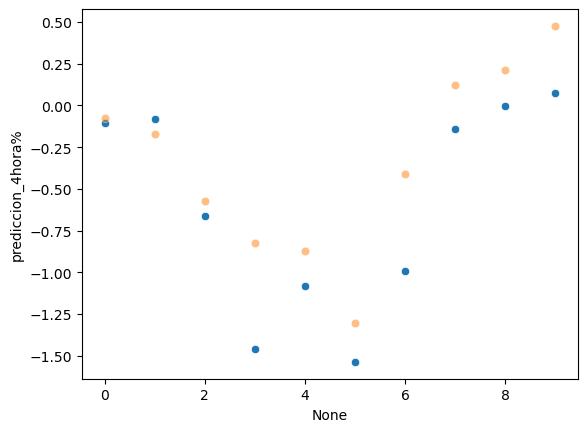

,real,pred,direccion_correcta,dif
0,-0.107157,-0.075957,True,-0.031200
1,-0.081196,-0.172531,True,0.091335
2,-0.663299,-0.571755,True,-0.091545
3,-1.461286,-0.821443,True,-0.639843
4,-1.079771,-0.870337,True,-0.209434
5,-1.537022,-1.301254,True,-0.235768
6,-0.994732,-0.409509,True,-0.585223
7,-0.143928,0.120214,False,-0.264142
8,-0.003234,0.211409,False,-0.214643
9,0.076183,0.476519,True,-0.400336


In [14]:
sns.scatterplot(x=X_outsider.index,y=y_outsider)
sns.scatterplot(x=X_outsider.index,y=predicciones_outsider,alpha=0.5)
plt.show()

comparativa_rf=pd.DataFrame(columns=["real","pred","direccion_correcta"])
comparativa_rf["real"]=y_outsider
comparativa_rf["pred"]=predicciones_outsider
comparativa_rf["dif"]=y_outsider-predicciones_outsider

for i in range(len(comparativa_rf["real"])):
    if ((comparativa_rf["pred"][i] * comparativa_rf["real"][i])>0) :
        comparativa_rf.loc[i,"direccion_correcta"]=True
    elif ((comparativa_rf["pred"][i] * comparativa_rf["real"][i])<0):
        comparativa_rf.loc[i,"direccion_correcta"]=False
comparativa_rf

en teoria las derecciones la da bien, eso es un punto a favor, pero debemos mejorar la precision
y testear de forma realista.

FACTORES A CONCIDERAR:
-RELATIVIDAD DE MARGEN(OSEA, QUE TANTO PORCENTAJE DE ERROR HAY CON RESPECTO AL TOTAL DEL MOVIMIENTO)
-CANTIDAD DE ACIERTOS DE DIRECCION
-CALCULAR SOLO CON EL PRIMER DATO DESPUES DEL CONJUNTO DE ENTRENAMIENTO.
-VER QUE CANTIDAD DE DATOS DA LA MEJOR APROXIMACION
-VER TAMBIEN QUE TEMPORALIDAD DE PREDICCION ES MEJOR,INTENTANDO DE QUE SEA CUANTO MUCHO 1 DIA.
PRIMERO DEBO PLANTEAR PARAMETROS, PARA FINALMENTE AVRIAR LA CANTIDAD DE MUESTRAS, PARA PODER VER ASI CUAL MEJORA TODOS LOS INDICADORES.



In [15]:
df_base["Open time"][1][:10]

'2017-08-22'

In [16]:
import requests
import pandas as pd

# Pedimos 3000 días de datos
url = "https://api.alternative.me/fng/?limit=3000&format=json"
response = requests.get(url).json()

# Lo pasamos a DataFrame
data = response['data']
sentimientos = pd.DataFrame(data)

# Limpieza de columnas
sentimientos['timestamp'] = pd.to_datetime(sentimientos['timestamp'], unit='s')
sentimientos['value'] = sentimientos['value'].astype(int)  # Fear & Greed index (0-100)

# Ordenamos cronológicamente
sentimientos = sentimientos.sort_values('timestamp').reset_index(drop=True)


print(sentimientos.tail(20))

      value value_classification  timestamp time_until_update
2766     49              Neutral 2025-09-02               NaN
2767     55                Greed 2025-09-03               NaN
2768     51              Neutral 2025-09-04               NaN
2769     48              Neutral 2025-09-05               NaN
2770     48              Neutral 2025-09-06               NaN
2771     44                 Fear 2025-09-07               NaN
2772     51              Neutral 2025-09-08               NaN
2773     48              Neutral 2025-09-09               NaN
2774     49              Neutral 2025-09-10               NaN
2775     54              Neutral 2025-09-11               NaN
2776     57                Greed 2025-09-12               NaN
2777     52              Neutral 2025-09-13               NaN
2778     55                Greed 2025-09-14               NaN
2779     53              Neutral 2025-09-15               NaN
2780     52              Neutral 2025-09-16               NaN
2781    

/tmp/ipykernel_5145/1245845176.py:13: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sentimientos['timestamp'] = pd.to_datetime(sentimientos['timestamp'], unit='s')


In [200]:
#ahora le pondremos los valores de valor a de cada dia a todas las hora de ese dia del otro dataset :
df_porcentual["sentimientos"] = np.zeros(len(df_porcentual))

for i in range(len(df_porcentual["time"])):
    for e in range (len(sentimientos["timestamp"])):

        if str(df_porcentual["time"][i][:10])==str(sentimientos["timestamp"][e])[:10]:
            
            df_porcentual.loc[i,"sentimientos"]=sentimientos["value"][e]



In [568]:
df_porcentual

,time,close,rsi_9,rsi_14,rsi_21,volumen,hora%,4hora%,dia%,2dias%,1semana%,prediccion_4hora%,prediccion_1dia%,sentimientos,high,low,hora%.
0,2017-08-29 06:00:00,4363.21,56.753894,55.637101,54.442558,30.454450,-0.148046,-1.122421,-3.368127,-1.119609,-14.730739,0.374724,-5.151941,0.0,3854.46,3619.95,-14.804580
1,2017-08-29 07:00:00,4329.02,47.872281,50.202718,50.910583,39.971942,0.783597,1.095959,-1.574884,-0.351891,-13.979168,-0.911985,-5.105082,0.0,3803.00,3733.80,78.359740
2,2017-08-29 08:00:00,4352.52,53.499283,53.560314,53.106181,25.947430,-0.542848,0.243860,-2.347215,-1.171045,-14.717510,-1.276502,-4.598945,0.0,3805.76,3750.08,-54.284803
3,2017-08-29 09:00:00,4367.40,56.819622,55.601627,54.460368,30.624444,-0.341871,-0.244218,-3.321505,-1.078270,-11.853832,-4.867885,-2.623987,0.0,3920.31,3775.01,-34.187092
4,2017-08-29 10:00:00,4346.86,51.148069,52.191266,52.272490,11.083362,0.470303,0.374724,-1.307225,-1.025628,-13.079332,-4.578247,-2.996186,0.0,3904.56,3826.12,47.030270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70137,2025-09-03 23:00:00,111705.71,48.903423,53.178829,55.068471,359.072170,0.215967,0.434989,-0.418644,-2.259565,-0.398788,0.498399,0.872686,55.0,108832.00,108140.00,21.596734
70138,2025-09-04 00:00:00,112065.61,57.213430,57.853563,57.920584,343.426230,-0.322186,0.129844,-0.651725,-2.774431,-0.652683,1.024543,1.440219,51.0,108725.50,108155.73,-32.218586
70139,2025-09-04 01:00:00,111947.48,53.972195,55.881391,56.680596,251.771570,0.105411,0.037673,-0.693075,-2.410034,-0.268505,1.156265,0.737819,51.0,108500.00,108101.07,10.541146
70140,2025-09-04 02:00:00,111450.15,42.554156,48.400792,51.780294,359.695320,0.444253,0.444253,-0.070170,-1.092230,0.044709,0.947688,0.098250,51.0,108744.00,107934.24,44.425297


In [ ]:
df_base=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/data/raw/df_base_1.csv")
df_porcentual["high"]=df_base["High"]
df_porcentual["low"]=df_base["Low"]
df_porcentual["hora%."]=df_porcentual["hora%"]
df_porcentual["hora%.."]=df_porcentual["hora%"]

In [526]:
#debemos hacer una prueba mas real, simulando ganancias ,perdidas y usos reales.

#SE DEBERIA HACR UNA TABLITA CON LA QUE COMPARAR TODOS LOS RESULTADOS.
#tabla_resultados=pd.DataFrame(columns=["nuemro_muestras","temporalidad","acierto_direccion","error_relativo_aciertos","error_relativo_total","numero de estimmadores"])#debira tener la cantidad de aciertos de direccion, error de medicion en % 





In [ ]:
relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["time","prediccion_4hora%","prediccion_1dia%","rsi_9","hora%..","hora%."]
medir="prediccion_1dia%"
for i in range(200):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[60000+i:65000+i]
    
    outsider=df_porcentual[65000+i+1:65000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=RandomForestRegressor( n_estimators=60, random_state=42)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


In [ ]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')


error_aciertos: 0.7404610943057592
n_aciertos: 0.755
error total: 0.2311597368959648


columnas:time	close	rsi_9	rsi_14	rsi_21	volumen	hora%	4hora%	dia%	2dias%	1semana%	prediccion_4hora%	prediccion_1dia%	sentimientos	high	low	dia%.	hora%.
restricciones:"time","prediccion_4hora%","prediccion_1dia%","rsi_9","rsi_14"

error_aciertos: 0.3457113517673145
n_aciertos: 0.7
error total: 0.07206517435364092

In [ ]:
mayor=[]
for i in error_aciertos_list:
    if 0 < abs(i) < 1:
        mayor.append(i)
len(mayor)
# print(len(error_aciertos_list))

135

<Axes: xlabel='None', ylabel='real'>

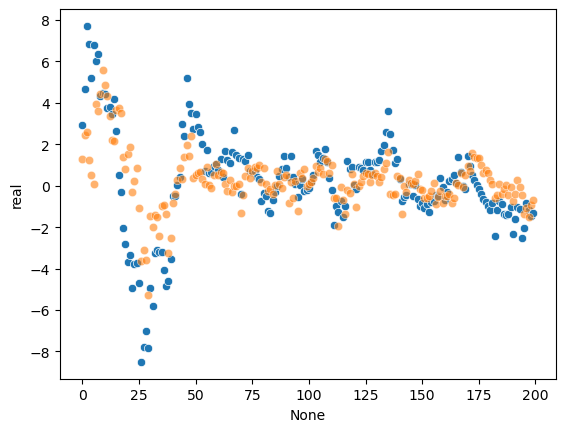

In [ ]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)

In [700]:
for i in range(len(guardados["real"])):
    guardados.loc[i,"dif"]=(guardados["real"][i]-guardados["predicciones"][i])

for i in range(len(guardados["dif"])):
    if i+1&24==0:
        
        print(guardados["dif"][i])



2.0121744515245417
2.4126688248955097
5.235435372980041
5.331028746201492
4.429027874079832
5.938749855441732
1.7201056304467528
-3.7535880674951367
-1.8543628037944342
-2.0930324145541466
-0.8318264854415918
-2.221745566853474
-3.273338278125557
-3.704278094070053
-1.1944929905667907
2.1541505198763877
1.5909966766569281
0.9341010175929679
2.181748947047116
2.4949321623295897
1.1949778091403775
1.210559370810546
1.3690979656980038
1.0454307934805505
-0.7071245921833029
-0.33375094639673364
-1.0849724347973622
-0.3765742632433891
0.04313623137353355
0.1602870893696647
0.1766561438228894
0.38155956223376997
-0.09679238085694841
0.22589911572929233
0.45714650928246836
0.8640774080206303
1.0812124706571444
1.0866805696201451
1.2784963545561934
0.6218588921304197
-0.2982475686529722
0.27899924672880466
0.4192766323672328
1.145626199117567
1.1043182894233308
-0.21965333368687923
1.1539518413272496
-1.2808394326572687
-1.3658112364435269
-0.8834548441113886
-1.9856159271177931
-0.51599005936

In [691]:
ganancia=[]
peridida=[]
margen=0.75
for i in range(len(guardados["real"])):
    if guardados["real"][i]*guardados["predicciones"][i]<0:
        peridida.append(abs(guardados["predicciones"][i])*margen)
    elif ((guardados["real"][i]*guardados["predicciones"][i])>0) and (guardados["real"][i]>0 )and (guardados["predicciones"][i]*margen<=guardados["real"][i]):
        ganancia.append(guardados["predicciones"][i]*margen)
    elif ((guardados["real"][i]*guardados["predicciones"][i])>0) and (guardados["real"][i]>0 )and (guardados["predicciones"][i]*margen>guardados["real"][i]):
        peridida.append(abs(guardados["predicciones"][i])*margen/3)
    elif guardados["real"][i]*guardados["predicciones"][i]>0 and guardados["real"][i]<0 and guardados["predicciones"][i]*margen>guardados["real"][i]:
        ganancia.append(abs(guardados["predicciones"][i]*margen))
    elif guardados["real"][i]*guardados["predicciones"][i]>0 and guardados["real"][i]<0 and guardados["predicciones"][i]*margen<guardados["real"][i]:
        peridida.append(abs(guardados["predicciones"][i])*margen/3)

In [692]:
print(f'ganacia: {np.array(ganancia).sum()}')
print(f'perdida: {np.array(peridida).sum()}')
print(f'rentabilidad: {np.array(ganancia).sum()-np.array(peridida).sum()}')

ganacia: 101.56105565720604
perdida: 30.108484026958365
rentabilidad: 71.45257163024768


# MODELO XGBoost 

In [605]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [606]:
df_porcentual

,time,close,rsi_9,rsi_14,rsi_21,volumen,hora%,4hora%,dia%,2dias%,1semana%,prediccion_4hora%,prediccion_1dia%,sentimientos,high,low,hora%.,hora%..
0,2017-08-29 06:00:00,4363.21,56.753894,55.637101,54.442558,30.454450,-0.148046,-1.122421,-3.368127,-1.119609,-14.730739,0.374724,-5.151941,0.0,3854.46,3619.95,-0.148046,-0.148046
1,2017-08-29 07:00:00,4329.02,47.872281,50.202718,50.910583,39.971942,0.783597,1.095959,-1.574884,-0.351891,-13.979168,-0.911985,-5.105082,0.0,3803.00,3733.80,0.783597,0.783597
2,2017-08-29 08:00:00,4352.52,53.499283,53.560314,53.106181,25.947430,-0.542848,0.243860,-2.347215,-1.171045,-14.717510,-1.276502,-4.598945,0.0,3805.76,3750.08,-0.542848,-0.542848
3,2017-08-29 09:00:00,4367.40,56.819622,55.601627,54.460368,30.624444,-0.341871,-0.244218,-3.321505,-1.078270,-11.853832,-4.867885,-2.623987,0.0,3920.31,3775.01,-0.341871,-0.341871
4,2017-08-29 10:00:00,4346.86,51.148069,52.191266,52.272490,11.083362,0.470303,0.374724,-1.307225,-1.025628,-13.079332,-4.578247,-2.996186,0.0,3904.56,3826.12,0.470303,0.470303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70137,2025-09-03 23:00:00,111705.71,48.903423,53.178829,55.068471,359.072170,0.215967,0.434989,-0.418644,-2.259565,-0.398788,0.498399,0.872686,55.0,108832.00,108140.00,0.215967,0.215967
70138,2025-09-04 00:00:00,112065.61,57.213430,57.853563,57.920584,343.426230,-0.322186,0.129844,-0.651725,-2.774431,-0.652683,1.024543,1.440219,51.0,108725.50,108155.73,-0.322186,-0.322186
70139,2025-09-04 01:00:00,111947.48,53.972195,55.881391,56.680596,251.771570,0.105411,0.037673,-0.693075,-2.410034,-0.268505,1.156265,0.737819,51.0,108500.00,108101.07,0.105411,0.105411
70140,2025-09-04 02:00:00,111450.15,42.554156,48.400792,51.780294,359.695320,0.444253,0.444253,-0.070170,-1.092230,0.044709,0.947688,0.098250,51.0,108744.00,107934.24,0.444253,0.444253


In [715]:
relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["time","prediccion_4hora%","prediccion_1dia%","rsi_9","rsi_14","sentimientos","hora%.","hora%.."]
medir="prediccion_1dia%"
for i in range(200):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[60000+i:65000+i]
    
    outsider=df_porcentual[65000+i+1:65000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=XGBRegressor(random_state=2000,colsample_bytree=1.0, gamma= 0.5, learning_rate= 0.05, max_depth= 9, min_child_weight= 5, n_estimators= 160, reg_alpha= 0.01, reg_lambda= 0.5, subsample= 0.8)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


param_grid = {
    # Complejidad del árbol
    'max_depth': [ 7, 9],
    'min_child_weight': [ 5, 7],

    # Regularización en divisiones
    'gamma': [ 0.5, 1],

    # Submuestreo de datos y features
    'subsample': [ 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],

    # Tasa de aprendizaje
    'learning_rate': [0.01, 0.05],

    # Número de árboles
    'n_estimators': [100, 200],

    # Regularización L1 y L2
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 2]
}
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # o 'r2', 'neg_mean_absolute_error'
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)
print("eeee")

In [716]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')


error_aciertos: 1.240664566284006
n_aciertos: 0.715
error total: 0.591217315612017


**"time","prediccion_4hora%","prediccion_1dia%","rsi_9","rsi_14","sentimientos","dia%"**
#
(1 dia,100 intentos)
error_aciertos: 0.6640222952986072
n_aciertos: 0.76
error total: 0.15302872028827852

**mejor de momento:restricciones:"time","prediccion_4hora%","prediccion_1dia%","rsi_9","rsi_14"** 



#
(1 dia,100 intentos)

error_aciertos: 0.721313814198026
n_aciertos: 0.78
error total: 0.12286589146273892
#
(4horas,100 intentos)

error_aciertos: 0.2660764897746101
n_aciertos: 0.55
error total: 0.02216492386646697


In [717]:
mayor=[]
for i in error_aciertos_list:
    if 0 < abs(i) < 1:
        mayor.append(i)
len(mayor)
# print(len(error_aciertos_list))

128

<Axes: xlabel='None', ylabel='real'>

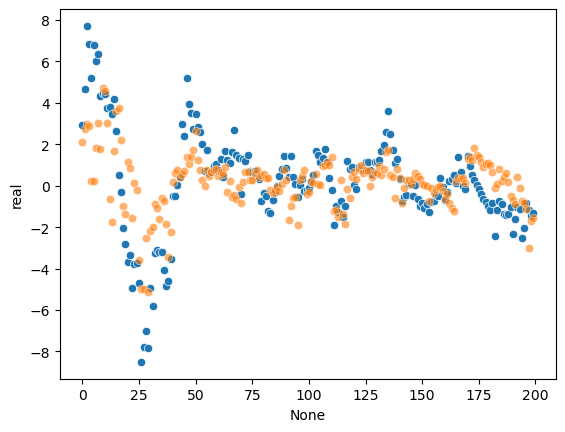

In [718]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)

In [719]:
for i in range(len(guardados["real"])):
    guardados.loc[i,"dif"]=(guardados["real"][i]-guardados["predicciones"][i])

guardados

,real,predicciones,dif
0,2.916521,2.133656,0.782865
1,4.674387,2.743790,1.930597
2,7.716232,2.968114,4.748118
3,6.855154,2.892021,3.963133
4,5.209438,0.230122,4.979317
...,...,...,...
195,-2.051361,-0.819313,-1.232048
196,-0.818386,-1.127726,0.30934
197,-1.165177,-3.002843,1.837666
198,-1.439959,-1.701121,0.261162


In [720]:
ganancia=[]
peridida=[]
margen=0.75
for i in range(len(guardados["real"])):
    if guardados["real"][i]*guardados["predicciones"][i]<0:
        peridida.append(abs(guardados["predicciones"][i])*margen)
    elif ((guardados["real"][i]*guardados["predicciones"][i])>0) and (guardados["real"][i]>0 )and (guardados["predicciones"][i]*margen<=guardados["real"][i]):
        ganancia.append(guardados["predicciones"][i]*margen)
    elif ((guardados["real"][i]*guardados["predicciones"][i])>0) and (guardados["real"][i]>0 )and (guardados["predicciones"][i]*margen>guardados["real"][i]):
        peridida.append((abs(guardados["predicciones"][i])*margen)/3)
    elif guardados["real"][i]*guardados["predicciones"][i]>0 and guardados["real"][i]<0 and guardados["predicciones"][i]*margen>guardados["real"][i]:
        ganancia.append(abs(guardados["predicciones"][i]*margen))
    elif guardados["real"][i]*guardados["predicciones"][i]>0 and guardados["real"][i]<0 and guardados["predicciones"][i]*margen<guardados["real"][i]:
        peridida.append((abs(guardados["predicciones"][i])*margen)/3)


In [721]:
print(f'ganacia: {np.array(ganancia).sum()}')
print(f'perdida: {np.array(peridida).sum()}')
print(f'rentabilidad: {np.array(ganancia).sum()-np.array(peridida).sum()}')

ganacia: 99.57789611816406
perdida: 33.04695129394531
rentabilidad: 66.53094482421875


In [659]:
df_base["pred_dia"]=df_base["Close"].shift(-24)
df_base

,Open time,Open,High,Low,Close,Volume,Prom_dia,100_medias,48_medias,20_medias,10_medias,rsi_14,rsi_9,rsi_21,Cambio_dia,pred_dia
0,2017-08-22 06:00:00,3626.99,3854.46,3619.95,3803.00,62.096369,3737.205,4083.50800,4028.432813,3928.07000,3857.6535,46.761819,47.324021,48.100095,-176.01,4080.00
1,2017-08-22 07:00:00,3803.00,3803.00,3733.80,3798.08,61.959721,3768.400,4078.21685,4020.889167,3911.07725,3831.7685,46.548444,47.050470,47.917537,4.92,4074.88
2,2017-08-22 08:00:00,3798.08,3805.76,3750.08,3794.12,36.868111,3777.920,4073.18735,4013.585417,3897.29450,3804.7085,46.365061,46.805487,47.764330,3.96,4124.00
3,2017-08-22 09:00:00,3794.12,3920.31,3775.01,3904.56,76.172178,3847.660,4068.33245,4006.420208,3885.61275,3780.0075,52.039857,54.275251,52.236330,-110.44,4203.12
4,2017-08-22 10:00:00,3904.56,3904.56,3826.12,3844.08,59.322181,3865.340,4063.85575,3999.707604,3879.05725,3763.3435,48.983379,49.953645,49.785506,60.48,4228.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70300,2025-09-05 11:00:00,112256.36,112439.36,112138.15,112354.00,270.503080,112288.755,110622.15130,111230.909896,110996.54300,111784.1115,61.400485,63.852666,58.915642,-97.64,NaN
70301,2025-09-05 12:00:00,112354.00,113384.62,112040.00,113214.78,2902.049780,112712.310,110657.94995,111246.339792,111131.17925,111933.6055,68.073543,73.090802,63.894324,-860.78,NaN
70302,2025-09-05 13:00:00,113214.78,113310.01,112706.71,113084.16,2093.909320,113008.360,110688.85295,111272.740208,111290.51325,112078.6925,66.203188,70.035215,62.684000,130.62,NaN
70303,2025-09-05 14:00:00,113084.16,113084.16,110487.65,110569.99,3593.878660,111785.905,110721.94670,111304.307500,111457.35650,112257.6625,42.180304,36.759037,45.330016,2514.17,NaN


In [660]:
relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["pred_dia","Open time"]
medir="pred_dia"
for i in range(100):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_base[55000+i:65000+i]
    
    outsider=df_base[65000+i+1:65000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=XGBRegressor(random_state=1000,colsample_bytree=1.0, gamma= 0.5, learning_rate= 0.05, max_depth= 9, min_child_weight= 5, n_estimators= 160, reg_alpha= 0.01, reg_lambda= 0.5, subsample= 0.8)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [661]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')


error_aciertos: 0.011519398199253952
n_aciertos: 1.0
error total: 0.011519398199253952


<Axes: xlabel='None', ylabel='real'>

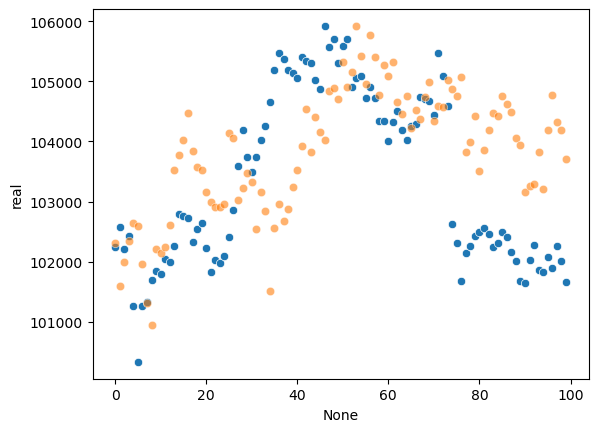

In [662]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)